In [1]:
from bengrn import BenGRN
import scanpy as sc
from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from grnndata import utils as grnutils
from grnndata import read_h5ad

from matplotlib import pyplot as plt
from scdataloader import utils as data_utils
import numpy as np

from pyvis import network as pnx
import networkx as nx
import scipy.sparse
import pandas as pd
import gseapy as gp

%load_ext autoreload
%autoreload 2 

💡 connected lamindb: jkobject/scprint


In [ ]:
prostate_combined = sc.read_h5ad("../data/prostate_combined_o2uniqsx.h5ad")

In [2]:
grn = read_h5ad("../data/prostate_fibro_grn.h5ad")
grn_c = read_h5ad("../data/prostate_cancer_fibro_grn.h5ad")
#remove duplicates
grn.var.symbol = make_index_unique(grn.var.symbol.astype(str))
grn_c.var.symbol = make_index_unique(grn_c.var.symbol.astype(str))

grn.var['ensembl_id'] = grn.var.index
grn.var.index = grn.var.symbol
grn_c.var['ensembl_id'] = grn_c.var.index
grn_c.var.index = grn_c.var.symbol

grn.obs.cleaned_pred_disease_ontology_term_id.value_counts(),grn_c.obs.cleaned_pred_disease_ontology_term_id.value_counts()

## Hub elements

https://www.genecards.org/cgi-bin/carddisp.pl?gene=CD99

https://www.genecards.org/cgi-bin/carddisp.pl?gene=CFH

https://www.genecards.org/cgi-bin/carddisp.pl?gene=TFPI

https://www.genecards.org/cgi-bin/carddisp.pl?gene=TMEM176A

In [6]:
common = set(grn_c.var.symbol) & set(grn.var.symbol)

In [7]:
len(common)

2881

In [8]:
grn.grn.sum(0).sort_values(ascending=False).head(20)

symbol
S100A6            58.131020
TGIF2-RAB5IF      51.177635
MIF               44.534096
DNAJB9            40.953262
IGFBP7            38.629910
APOD              38.003906
BRME1             37.598698
SPARCL1           37.160854
TIMP1             36.671650
DCN               34.621376
C1S               32.746254
MGP               30.496748
nan-270           29.884596
SLC25A6           29.308729
BLOC1S5-TXNDC5    28.986681
CETN1             28.746281
FTL               28.266533
AKR1C1            27.641245
FBLN1             26.828733
MT2A              25.590197
dtype: float32

In [7]:
grn.grn.sum(0).loc[list(common)].sort_values(ascending=False).head(20)

symbol
TGIF2-RAB5IF      51.177635
IGFBP7            38.629910
APOD              38.003906
BRME1             37.598698
SPARCL1           37.160854
TIMP1             36.671650
DCN               34.621376
C1S               32.746254
MGP               30.496748
BLOC1S5-TXNDC5    28.986681
AKR1C1            27.641245
FBLN1             26.828733
MT2A              25.590197
MYOC              25.428144
FAM205A           25.296257
YBX3              24.937267
CST3              24.676405
C11orf96          18.731924
TFPI              18.429214
ATP6V0C           17.695705
dtype: float32

In [11]:
grn_c.grn.sum(0).sort_values(ascending=False).head(20)

symbol
HSPA1A          75.300415
MT2A            57.938267
CREM            42.478115
TGIF2-RAB5IF    39.980556
HSPE1           38.607624
CALD1           36.512047
SPOCK3          35.564945
HLA-A           33.446110
SPARCL1         33.403152
RBP1            32.482758
C1S             32.037743
BRME1-1         31.879770
FABP4           31.604069
nan-99          31.555256
LUM             30.523245
EIF4A1          29.690474
ATP6V0C         29.475002
PDZD2           27.333025
DEFA1           26.979454
CTSG            25.070097
dtype: float32

In [10]:
grn_c.grn.sum(0).loc[list(common)].sort_values(ascending=False).head(20)

symbol
HSPA1A            75.300415
MT2A              57.938267
TGIF2-RAB5IF      39.980556
SPOCK3            35.564945
HLA-A             33.446110
SPARCL1           33.403152
C1S               32.037743
nan-99            31.555256
LUM               30.523245
EIF4A1            29.690474
ATP6V0C           29.475002
DEFA1             26.979454
IGFBP7            23.982243
DCN               23.304916
MGP               22.596451
CD99              21.624668
BLOC1S5-TXNDC5    20.914230
SERPING1          20.824636
COL6A2            18.076559
THBS1             17.826540
dtype: float32

In [12]:
TOP = 10
(set(grn_c.grn.sum(0).sort_values(ascending=False).head(TOP).index) - set(grn.grn.sum(0).sort_values(ascending=False).head(TOP).index)) & (set(grn_c.var.symbol) & set(grn.var.symbol))

{'HLA-A', 'HSPA1A', 'MT2A', 'SPOCK3'}

In [13]:
TOP = 20
(set(grn_c.grn.sum(0).sort_values(ascending=False).head(TOP).index) - set(grn.grn.sum(0).sort_values(ascending=False).head(TOP).index)) & (set(grn_c.var.symbol) & set(grn.var.symbol))

{'ATP6V0C', 'DEFA1', 'EIF4A1', 'HLA-A', 'HSPA1A', 'LUM', 'SPOCK3', 'nan-99'}

In [14]:
TOP = 50
(set(grn_c.grn.sum(0).sort_values(ascending=False).head(TOP).index) - set(grn.grn.sum(0).sort_values(ascending=False).head(TOP).index)) & (set(grn_c.var.symbol) & set(grn.var.symbol))

{'CD99',
 'CPE',
 'DEFA1',
 'EIF4A1',
 'HLA-A',
 'HSPA1A',
 'LGALS1',
 'LUM',
 'PYDC2',
 'SERPING1',
 'SPOCK3',
 'THBS1',
 'nan-191',
 'nan-99'}

overall we see that both are somewhat similar in the way the networks classifies main nodes but at least around half of the top 200 nodes are different between the two datasets and half of those are not due to diffent gene being used by the networks (50)

#### genes preferentially given as top elements in the tumor version only 

'CD99',
'CPE',
'DEFA1',
'EIF4A1',
'HLA-A',
'HSPA1A',
'LGALS1',
'LUM',
'PYDC2',
'SERPING1',
'SPOCK3',
'THBS1',

In [39]:
TOP = 20

grnutils.get_centrality(grn, TOP, top_k_to_disp=0)
grnutils.get_centrality(grn_c, TOP, top_k_to_disp=0)


Top central genes: []
Top central genes: []


[]

In [9]:
grn_c.var.centrality.sort_values(ascending=False).head(10)

symbol
HSPA1A     0.271584
MT2A       0.271584
CREM       0.271574
CD99       0.271517
NR4A3      0.271385
RBP1       0.271130
SOX4       0.264214
ATP6V0C    0.263235
HLA-A      0.232913
LUM        0.202007
Name: centrality, dtype: float64

In [10]:
grn.var.centrality.sort_values(ascending=False).head(10)

symbol
MT2A       0.276470
SLC25A6    0.276183
CXCL8      0.275859
FTH1       0.275757
MIF        0.267968
DNAJB9     0.265635
SOX4       0.241950
RELB       0.234482
YBX3       0.216567
CST3       0.213585
Name: centrality, dtype: float64

In [13]:
TOP = 10
(set(grn_c.var.centrality.sort_values(ascending=False).head(TOP).index) - set(grn.var.centrality.sort_values(ascending=False).head(TOP).index)) & (set(grn_c.var.symbol) & set(grn.var.symbol))

{'ATP6V0C', 'CD99', 'HLA-A', 'HSPA1A', 'LUM'}

In [12]:
TOP = 20
(set(grn_c.var.centrality.sort_values(ascending=False).head(TOP).index) - set(grn.var.centrality.sort_values(ascending=False).head(TOP).index)) & (set(grn_c.var.symbol) & set(grn.var.symbol))

{'ATP6V0C',
 'CD99',
 'EIF4A1',
 'HLA-A',
 'HSPA1A',
 'LUM',
 'PAGE4',
 'RYR2',
 'SERPINF1'}

In [11]:
TOP = 50
(set(grn_c.var.centrality.sort_values(ascending=False).head(TOP).index) - set(grn.var.centrality.sort_values(ascending=False).head(TOP).index)) & (set(grn_c.var.symbol) & set(grn.var.symbol))

{'C1R',
 'CD99',
 'COL6A2',
 'HLA-A',
 'HNRNPA0',
 'HSPA1A',
 'LUM',
 'PAGE4',
 'SERPINA3',
 'SERPING1',
 'SPOCK3',
 'THBS1'}

it seems the networks are even more similar when comparing them at the level of the centrality of their nodes. this means that some  are highly central  while maybe not 

## network general overlap

In [41]:
grn.var.index = grn.var.ensembl_id
grn_c.var.index = grn_c.var.ensembl_id
overlap = list(set(grn.var.index) & set(grn_c.var.index))

In [43]:
K = 20
subgrn_c = grn_c.get(overlap).grn
subgrn_c = subgrn_c.apply(lambda row: row >= row.nlargest(K).min(), axis=1)

subgrn = grn.get(overlap).grn
subgrn = subgrn.apply(lambda row: row >= row.nlargest(K).min(), axis=1)
(subgrn & subgrn_c).sum(1).mean() / K


0.5055735930735931

when looking at the top 20 connection for each genes in the network we see that on average only 50% of them agree between the two networks

# communities



In [75]:
grn = grnutils.compute_cluster(grn, 2.0)

In [ ]:
grn_c = grnutils.compute_cluster(grn_c, 1.5)
grn = grnutils.compute_cluster(grn, 1.5)

## cancer version

In [37]:
grn_c.var['cluster_1.5'].value_counts()

cluster_1.5
0     1456
1      947
2      653
3      560
4      294
5       34
6       31
7       20
8        3
9        1
10       1
Name: count, dtype: int64

['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4'] Index(['MPO', 'PYGM', 'SCT', 'HSD17B14', 'TLL2', 'IL11', 'TIMP1', 'ODAD1',
       'KCNA1', 'FBXO2', 'DPPA4', 'KCNG4', 'GARIN5B', 'GSTA5', 'GJC1',
       'SEPTIN5', 'PRAME', 'IL17REL', 'KRT77', 'CCT8L2', 'BTNL2', 'LY6G6F',
       'KRTAP4-8', 'TAS2R14', 'PROB1', 'PDXP', 'KIR3DL3', 'TMEM225B', 'INSL3',
       'nan-20', 'nan-46', 'nan-83', 'SMIM40', 'PPIAL4C'],
      dtype='object', name='symbol_2')


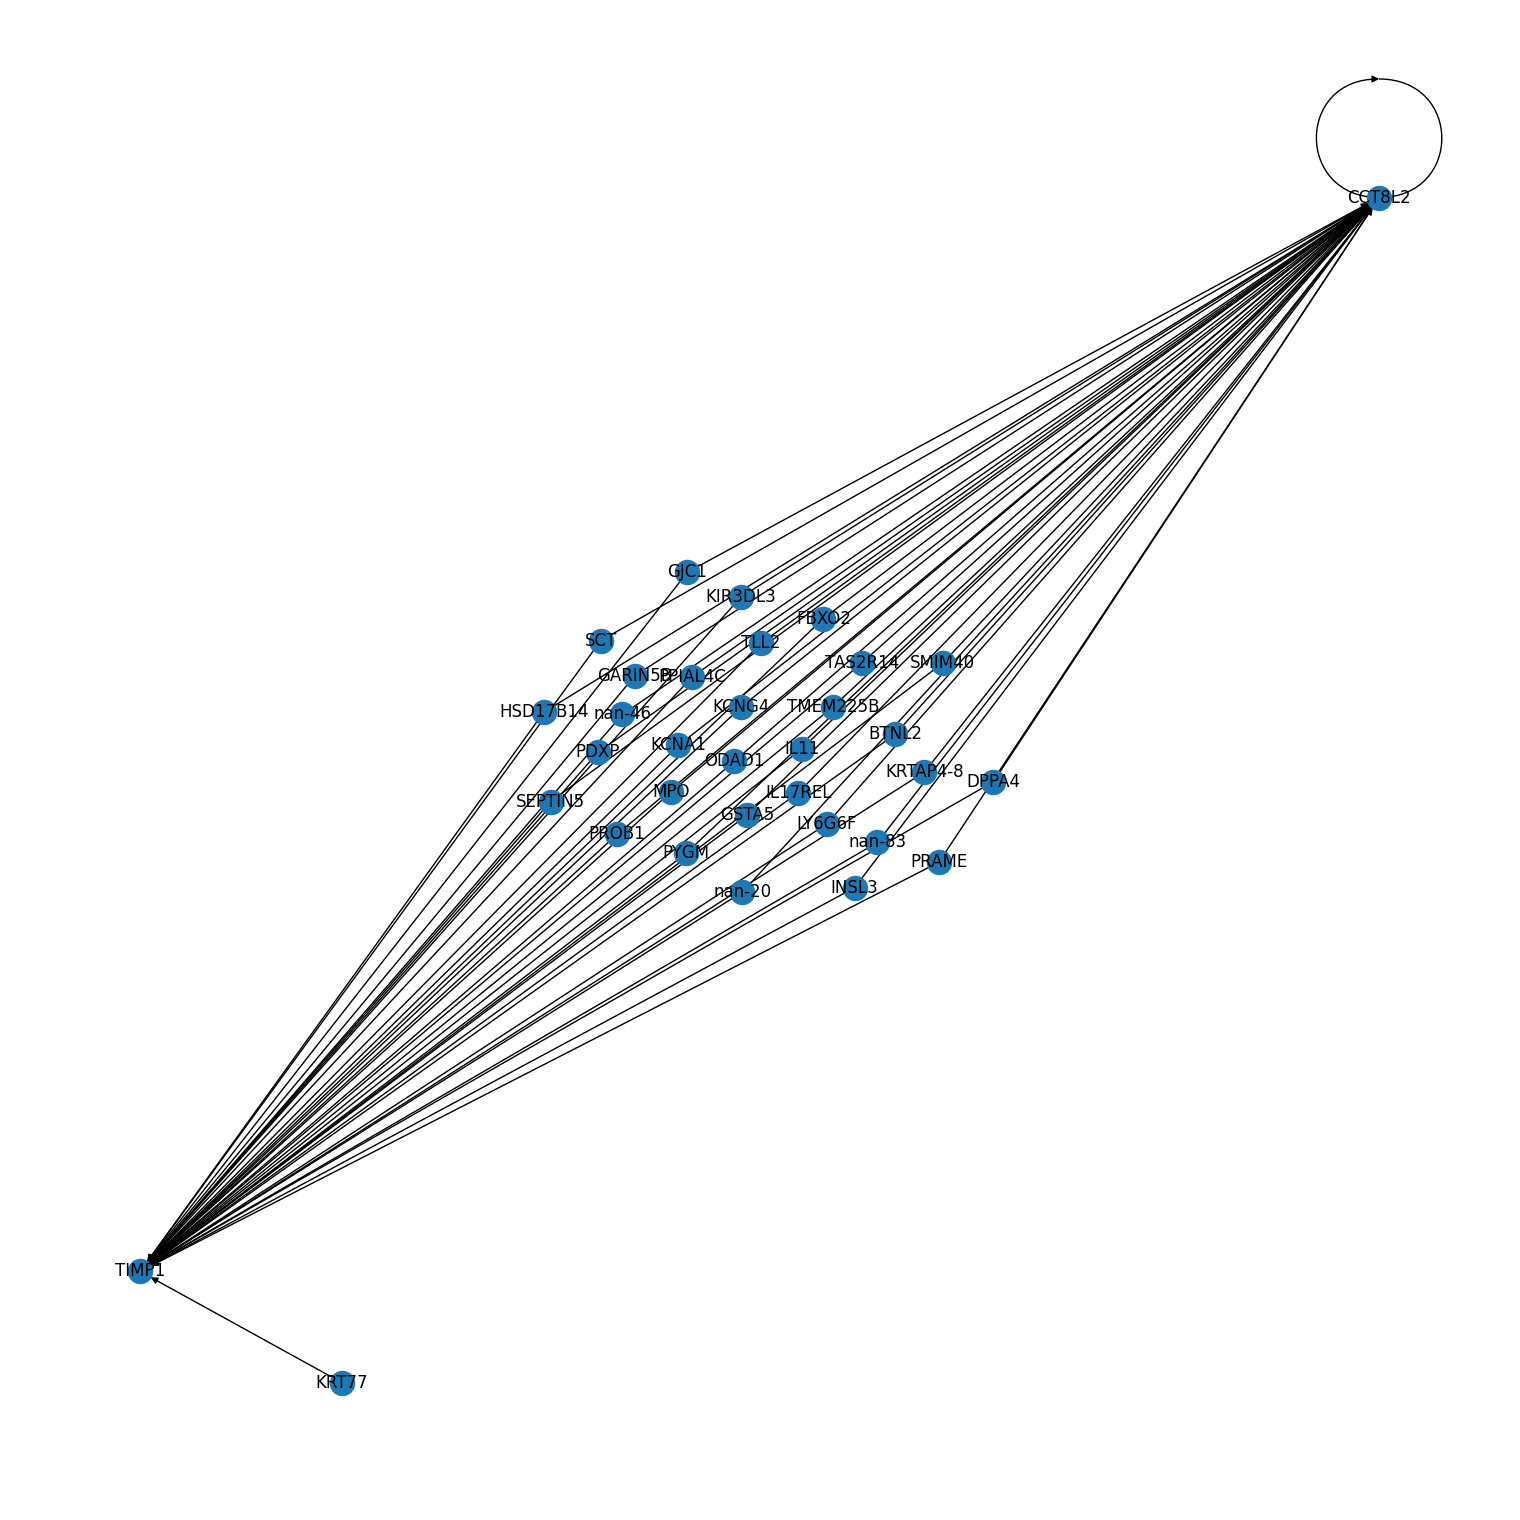

In [43]:
G = grn_c.plot_subgraph(grn_c.var[grn_c.var['cluster_1.5']=='5'].index.tolist(), only=80, interactive=False)#


In [46]:
# Assuming 'node_names' contains the list of gene names
enr = gp.enrichr(gene_list=list(G.nodes),
                 gene_sets=['KEGG_2021_Human', 'MSigDB_Hallmark_2020', 'Reactome_2022', 'Tabula_Sapiens', 'WikiPathway_2023_Human', 'TF_Perturbations_Followed_by_Expression', 'Reactome', 'PPI_Hub_Proteins', 'OMIM_Disease', 'GO_Molecular_Function_2023'],
                 organism='Human', # change accordingly
                 #description='pathway',
                 #cutoff=0.08, # test dataset, use lower value for real case  
                 background=grn_c.var.symbol.tolist(),
)
enr.res2d.head(10)

2024-07-19 15:03:19,729 [WARNING] Input library not found: Reactome. Skip


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Pyridoxal Phosphate Binding (GO:0030170),0.008500,0.101578,0,0,inf,inf,PYGM
1,GO_Molecular_Function_2023,Voltage-Gated Potassium Channel Activity (GO:0...,0.010955,0.101578,0,0,14.518382,65.534904,KCNG4;KCNA1
2,GO_Molecular_Function_2023,Potassium Channel Activity (GO:0005267),0.014566,0.101578,0,0,12.331250,52.149824,CCT8L2;KCNA1
3,GO_Molecular_Function_2023,Metal Ion Transmembrane Transporter Activity (...,0.016930,0.101578,0,0,120.151515,490.060134,KCNA1
4,GO_Molecular_Function_2023,Cyclosporin A Binding (GO:0016018),0.016930,0.101578,0,0,120.151515,490.060134,PPIAL4C
5,GO_Molecular_Function_2023,Disordered Domain Specific Binding (GO:0097718),0.016930,0.101578,0,0,120.151515,490.060134,KCNA1
6,GO_Molecular_Function_2023,Interleukin-17 Receptor Activity (GO:0030368),0.016930,0.101578,0,0,120.151515,490.060134,IL17REL
7,GO_Molecular_Function_2023,Estradiol 17-Beta-Dehydrogenase [NAD(P)] Activ...,0.016930,0.101578,0,0,120.151515,490.060134,HSD17B14
8,GO_Molecular_Function_2023,Nuclear Retinoic Acid Receptor Binding (GO:004...,0.016930,0.101578,0,0,120.151515,490.060134,PRAME
9,GO_Molecular_Function_2023,Protease Binding (GO:0002020),0.021555,0.116395,0,0,9.852500,37.805688,TIMP1;INSL3


In [ ]:
https://www.genecards.org/cgi-bin/carddisp.pl?gene=CCT8L2
CCT8L2 (Chaperonin Containing TCP1 Subunit 8 Like 2) is a Protein Coding gene. Gene Ontology (GO) annotations related to this gene include calcium-activated potassium channel activity and monoatomic anion channel activity. An important paralog of this gene is CCT8. related to the meta transmembrane activity via

Possible molecular chaperone; assists the folding of proteins upon ATP hydrolysis.
The TRiC complex mediates the folding of WRAP53/TCAB1, thereby regulating telomere maintenance (PubMed:25467444). As part of the TRiC complex may play a role in the assembly of BBSome, a complex involved in ciliogenesis regulating transports vesicles to the cilia

https://www.genecards.org/cgi-bin/carddisp.pl?gene=TIMP1
TIMP Metallopeptidase Inhibitor 1 
inhibitors of the matrix metalloproteinases (MMPs), a group of peptidases involved in degradation of the extracellular matrix. In addition to its inhibitory role against most of the known MMPs, the encoded protein is able to promote cell proliferation

connected to TLL2: zinc-dependent metalloprotease part of the metzincin protein complex which also is Among its related pathways are Collagen chain trimerization and Extracellular matrix organization. 

PDXP, SEPTIN5 cytoskeletal organization and regulation

PRAME inhibits the signaling of retinoic acid and mediates the regulation of selenoproteins

many genes involved in cancer. indeed, it is known that 80% adult male above 70 years old will have such hyperplastic prostate. This is due to scenesence. and that Iron accumulation drives fibrosis, senescence and the senescence-associated secretory phenotype. (of which we have some proteins present here.) A mechanism that this clustered is one of genes that strongly regulates each other in this fibroblasts from pre-cancerous lesions via fibrotic iron accumulation and a secretory mechanism
GJC1 (exchange of things between cells (here likely metals?))

Unknown genes like SMIM40. integral membrane protein could be linked to this phenotype


['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4'] Index(['TFAP2D', 'RASD2', 'ATP1A3', 'PTN', 'CALCA', 'TNFRSF8', 'IGLL1',
       'TOP2A', 'nan', 'LRTM1', 'STRA8', 'TEX44', 'OR13D1', 'TP53TG3', 'OSTN',
       'FAM237A', 'RTL9', 'PRB1', 'TP53TG3B', 'nan-98'],
      dtype='object', name='symbol_2')


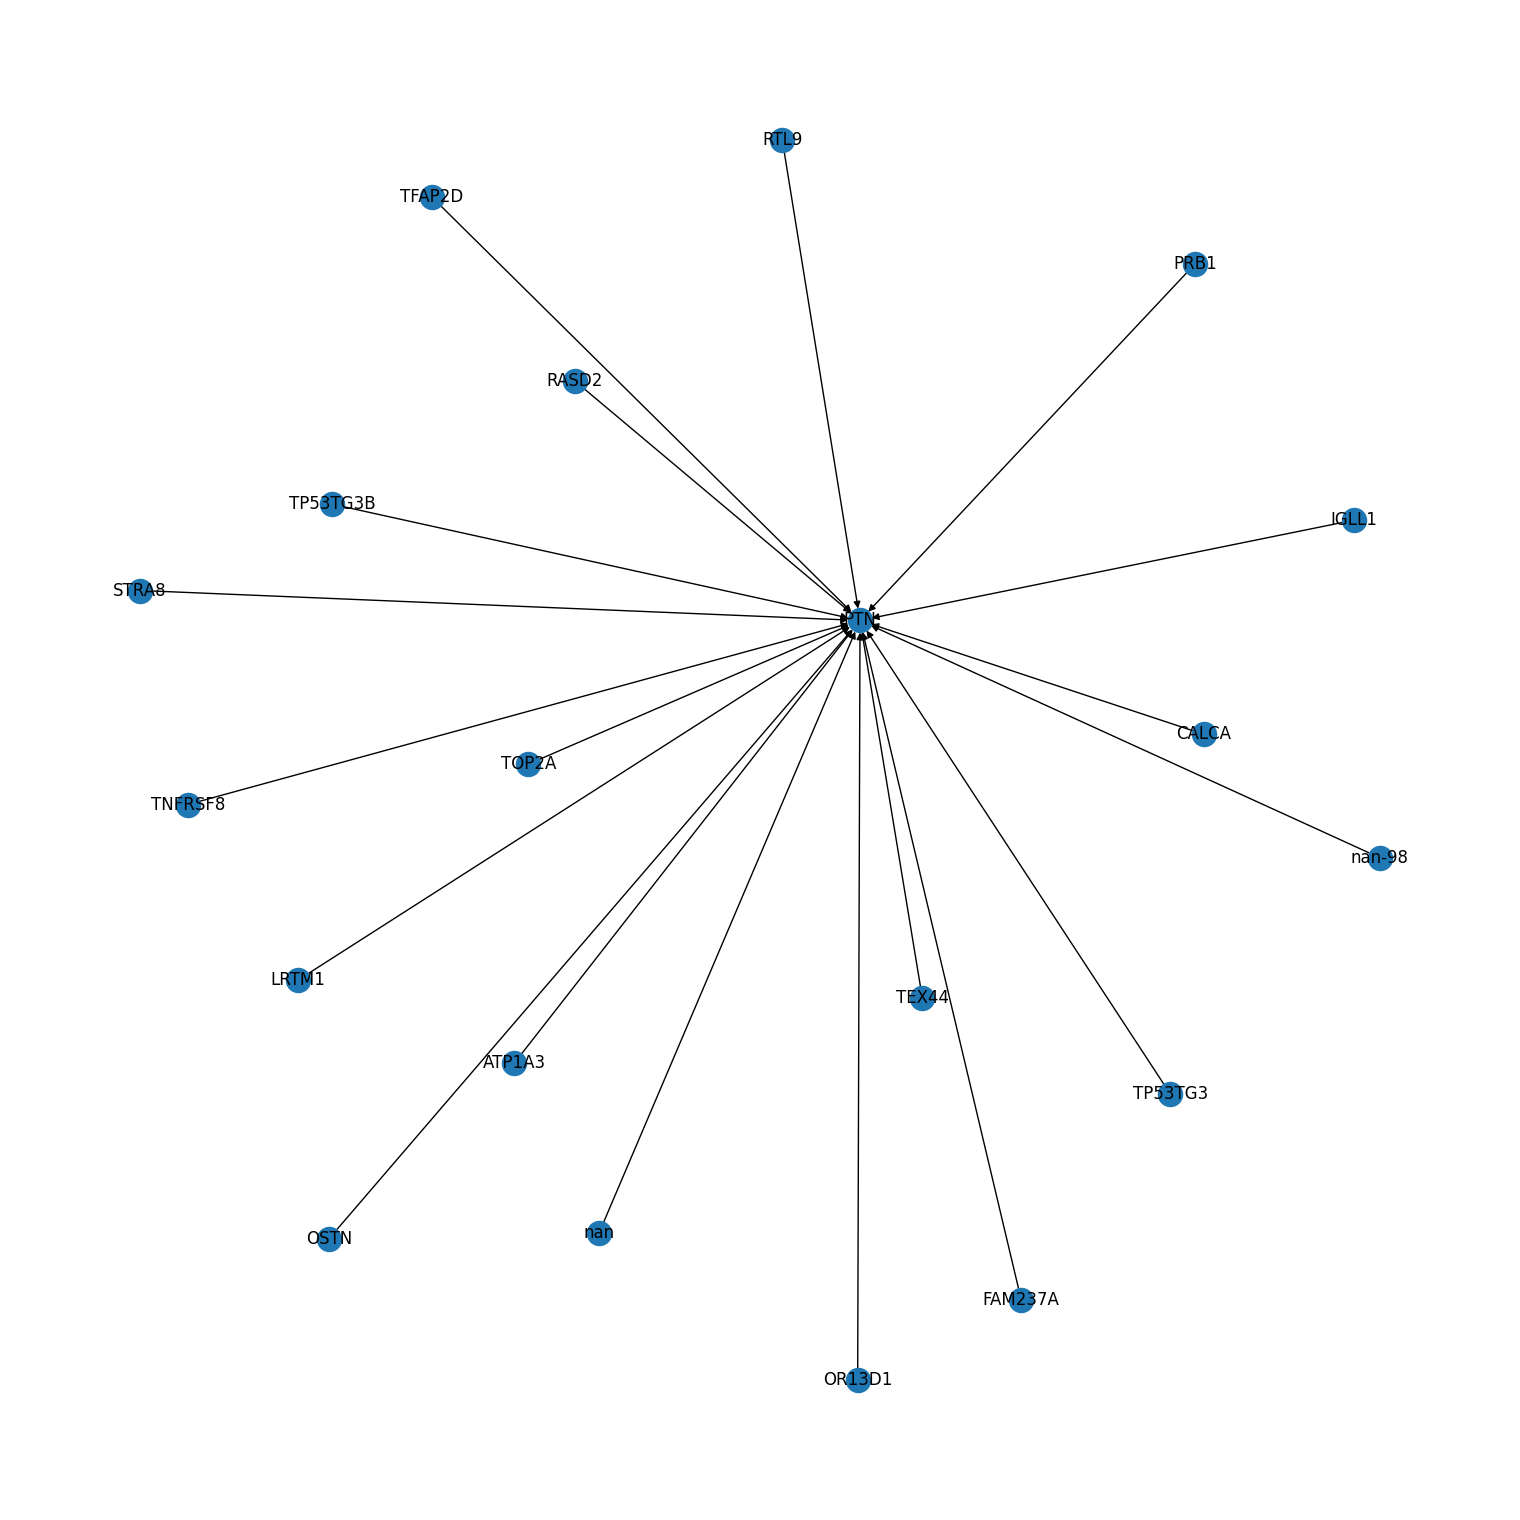

In [47]:
G = grn_c.plot_subgraph(grn_c.var[grn_c.var['cluster_1.5']=='7'].index.tolist(), only=80, interactive=False)#


In [50]:
enr = gp.enrichr(gene_list=list(G.nodes),
                 gene_sets=['KEGG_2021_Human', 'MSigDB_Hallmark_2020', 'Reactome_2022', 'Tabula_Sapiens', 'WikiPathway_2023_Human', 'TF_Perturbations_Followed_by_Expression', 'Reactome', 'PPI_Hub_Proteins', 'OMIM_Disease', 'GO_Molecular_Function_2023'],
                 organism='Human', # change accordingly
                 #description='pathway',
                 #cutoff=0.08, # test dataset, use lower value for real case  
                 background=grn_c.var.symbol.tolist(),
)
enr.res2d.head(20)


2024-07-19 15:06:50,478 [WARNING] Input library not found: Reactome. Skip


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Roundabout Binding (GO:0048495),0.005000,0.049881,0,0,inf,inf,LRTM1
1,GO_Molecular_Function_2023,Phosphatase Inhibitor Activity (GO:0019212),0.005000,0.049881,0,0,inf,inf,PTN
2,GO_Molecular_Function_2023,"DNA Binding, Bending (GO:0008301)",0.009976,0.049881,0,0,209.421053,964.919823,TOP2A
3,GO_Molecular_Function_2023,P-type Potassium Transmembrane Transporter Act...,0.009976,0.049881,0,0,209.421053,964.919823,ATP1A3
4,GO_Molecular_Function_2023,P-type Sodium Transporter Activity (GO:0008554),0.009976,0.049881,0,0,209.421053,964.919823,ATP1A3
5,GO_Molecular_Function_2023,P-type Sodium:Potassium-Exchanging Transporter...,0.009976,0.049881,0,0,209.421053,964.919823,ATP1A3
6,GO_Molecular_Function_2023,Ubiquitin Binding (GO:0043130),0.014929,0.063980,0,0,104.684211,440.141522,TOP2A
7,GO_Molecular_Function_2023,Protein Phosphatase Inhibitor Activity (GO:000...,0.019858,0.066192,0,0,69.771930,273.447451,PTN
8,GO_Molecular_Function_2023,Protein Phosphatase Regulator Activity (GO:001...,0.019858,0.066192,0,0,69.771930,273.447451,PTN
9,GO_Molecular_Function_2023,Protein Kinase Binding (GO:0019901),0.027124,0.081372,0,0,8.733333,31.504086,TOP2A;PTN


similar story to cluster above. 
this time with PTN often found in the litterature with 6 other m
Studies on the role of STEAP1, OR51E2, PTN, ABCC4, NDRG2 have been relatively in-depth. For instance, STEAP1 is all-called six-transmembrane epithelial antigen of the prostate 1, which belongs to a family of metalloproteinases involved in iron and copper homeostasis and other cellular processes

has been listed with 8 other members as predictors of CAF-related gene prognostic index (CRGPI) in prostate cancer. https://www.nature.com/articles/s41598-023-36125-0#Sec11 

 (NDRG2, TSPAN1, PTN, APOE, OR51E2, P4HB, STEAP1 and ABCC4 were used to construct molecular subtypes and)

https://www.genecards.org/cgi-bin/carddisp.pl?gene=GSN

['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4'] Index(['ABCB5', 'FGF10', 'KAZALD1', 'SLC1A2', 'CALD1', 'CDH18', 'GSN',
       'BRINP3', 'CAGE1', 'CSMD3', 'GRIK1', 'KRT9', 'LINGO2', 'SCN4B',
       'TMEM31', 'CLRN3', 'NPSR1', 'DUSP21', 'STK31', 'OR8D1', 'SLC22A25',
       'SYNGAP1', 'FABP12', 'OR10G6', 'PRR23E', 'TRIM77', 'RBMY1B', 'nan-13',
       'OOSP4B', 'TMC4', 'MBOAT7-1'],
      dtype='object', name='symbol_2')


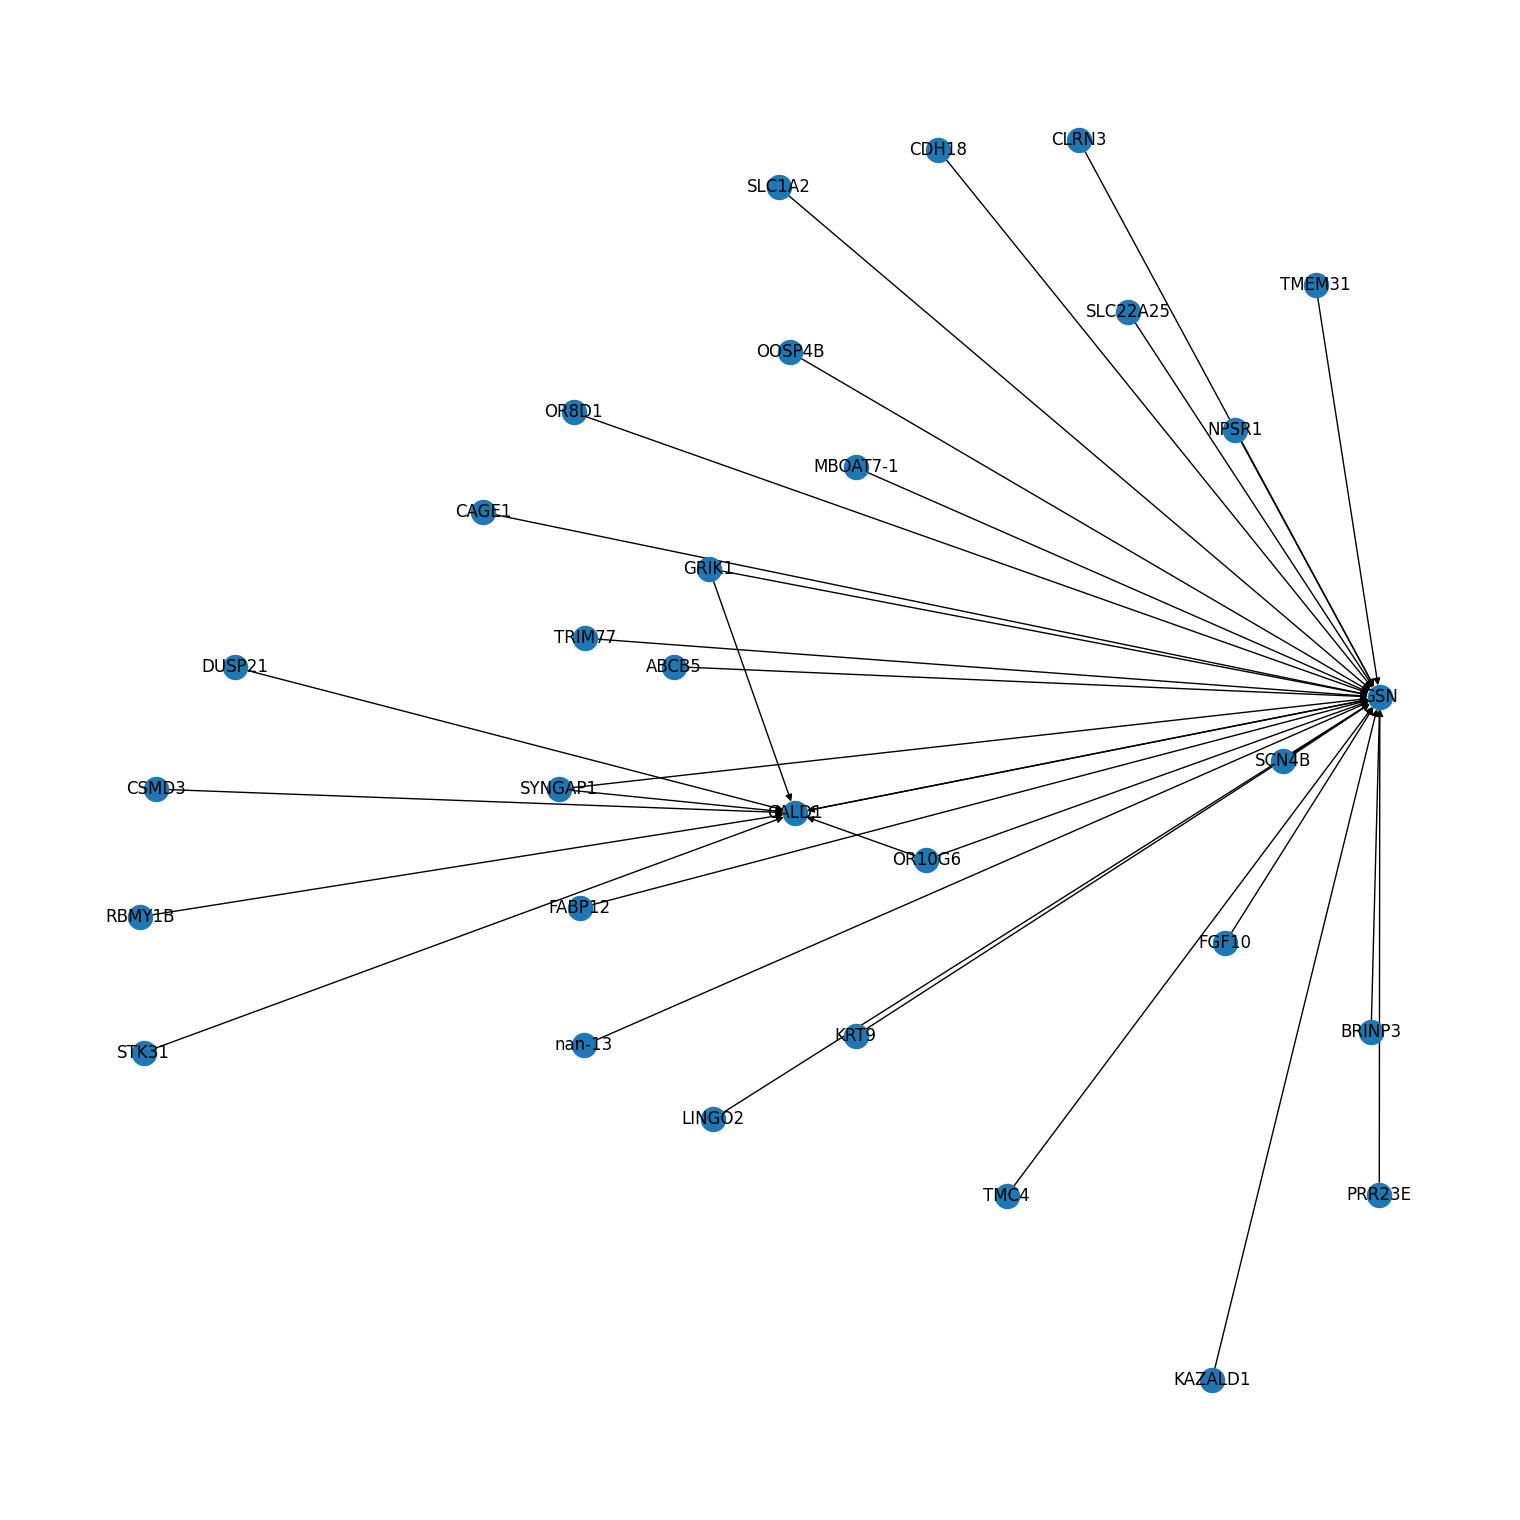

In [54]:
G = grn_c.plot_subgraph(grn_c.var[grn_c.var['cluster_1.5']=='6'].index.tolist(), only=80, interactive=False)#

In [62]:
enr = gp.enrichr(gene_list=list(G.nodes),
                 gene_sets=['GO_Molecular_Function_2023'],#, 'MSigDB_Hallmark_2020', 'Reactome_2022', 'Tabula_Sapiens', 'WikiPathway_2023_Human', 'TF_Perturbations_Followed_by_Expression', 'Reactome', 'PPI_Hub_Proteins', 'OMIM_Disease'],#, 'GO_Molecular_Function_2023'],
                 organism='Human', # change accordingly
                 #description='pathway',
                 #cutoff=0.08, # test dataset, use lower value for real case  
                 background=grn_c.var.symbol.tolist(),
)
enr.res2d.head(20)

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Sodium Channel Activity (GO:0005272),0.001192,0.030835,0,0,54.675862,368.098752,GRIK1;SCN4B
1,GO_Molecular_Function_2023,Myosin Binding (GO:0017022),0.001581,0.030835,0,0,45.551724,293.787427,GSN;CALD1
2,GO_Molecular_Function_2023,L-glutamate Transmembrane Transporter Activity...,0.007750,0.075562,0,0,inf,inf,SLC1A2
3,GO_Molecular_Function_2023,Acidic Amino Acid Transmembrane Transporter Ac...,0.007750,0.075562,0,0,inf,inf,SLC1A2
4,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),0.010127,0.078987,0,0,15.137931,69.522307,CALD1;CDH18
5,GO_Molecular_Function_2023,Myosin II Binding (GO:0045159),0.015442,0.086032,0,0,132.266667,551.642165,GSN
6,GO_Molecular_Function_2023,Mechanosensitive Monoatomic Ion Channel Activi...,0.015442,0.086032,0,0,132.266667,551.642165,TMC4
7,GO_Molecular_Function_2023,Actin Binding (GO:0003779),0.020724,0.089996,0,0,10.068966,39.032044,GSN;CALD1
8,GO_Molecular_Function_2023,Neutral L-amino Acid Transmembrane Transporter...,0.023076,0.089996,0,0,66.116667,249.191670,SLC1A2
9,GO_Molecular_Function_2023,Amino Acid:Sodium Symporter Activity (GO:0005283),0.023076,0.089996,0,0,66.116667,249.191670,SLC1A2


## normal version

In [77]:
grn.var['cluster_1.5'].value_counts()

cluster_1.5
0     1471
1      841
2      724
3      534
4      335
5       75
6        7
7        6
8        5
9        1
10       1
Name: count, dtype: int64

In [78]:
grn.var["cluster_2.0"].value_counts()

cluster_2.0
0     1199
1      654
2      504
3      494
4      341
5      255
6      186
7      185
8      101
9       20
10      17
11      16
12      12
13      10
14       1
15       1
16       1
17       1
18       1
19       1
Name: count, dtype: int64

https://www.genecards.org/cgi-bin/carddisp.pl?gene=MYOC

['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4'

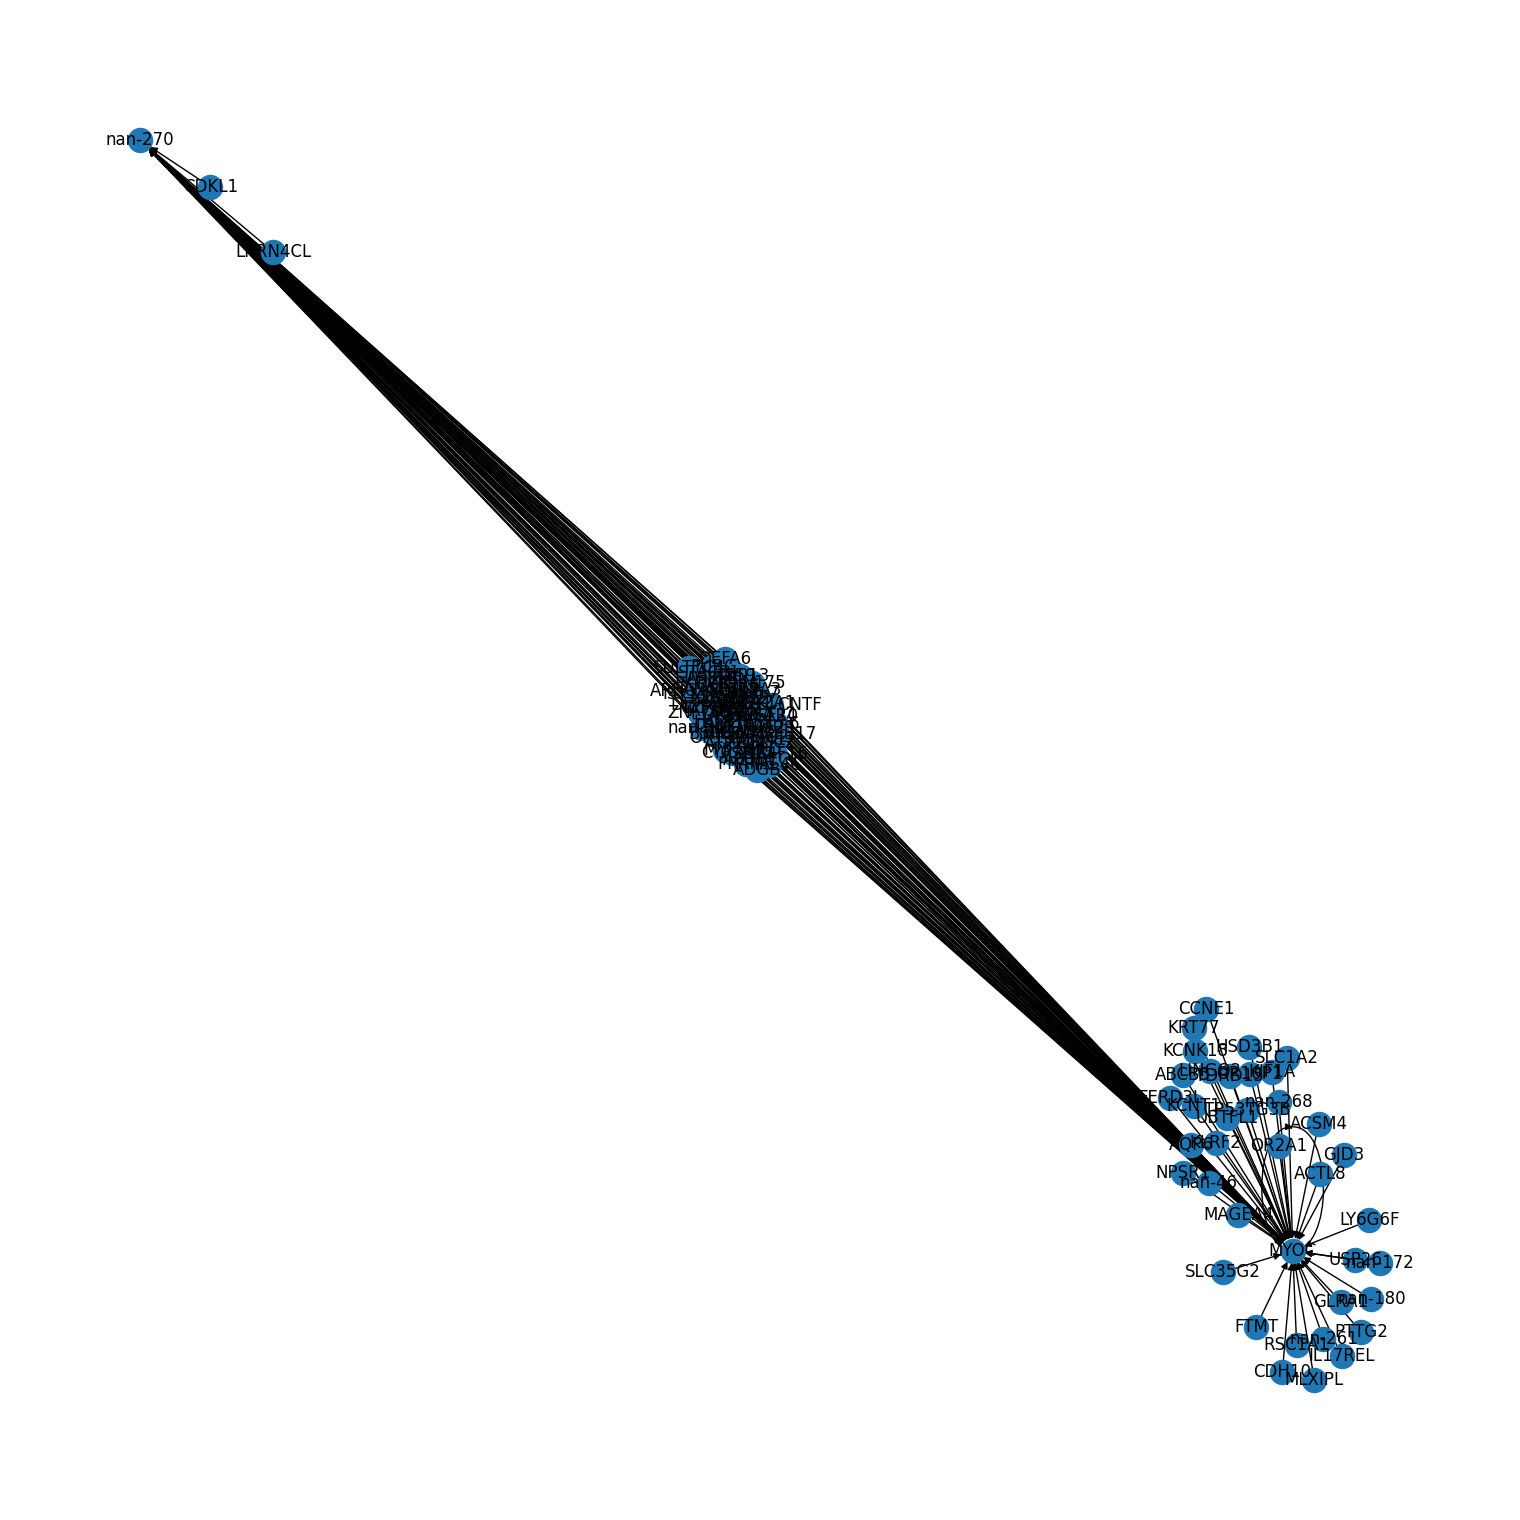

In [84]:
G = grn.plot_subgraph(grn.var[grn.var['cluster_2.0']=='8'].index.tolist(), only=160, interactive=False)


In [85]:
# Assuming 'node_names' contains the list of gene names
enr = gp.enrichr(gene_list=list(G.nodes),
                 gene_sets=['KEGG_2021_Human', 'MSigDB_Hallmark_2020', 'Reactome_2022', 'Tabula_Sapiens', 'WikiPathway_2023_Human', 'TF_Perturbations_Followed_by_Expression', 'Reactome', 'PPI_Hub_Proteins', 'OMIM_Disease', 'GO_Molecular_Function_2023'],
                 organism='Human', # change accordingly
                 #description='pathway',
                 #cutoff=0.08, # test dataset, use lower value for real case  
                 background=grn_c.var.symbol.tolist(),
)
enr.res2d.head(10)

2024-07-19 16:11:59,211 [WARNING] Input library not found: Reactome. Skip


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Protein Homodimerization Activity (GO:0042803),0.000568,0.063008,0,0,6.682759,49.947067,NTRK1;MLXIPL;DEFA6;DEFA4;KLRF2;ATP2A1
1,GO_Molecular_Function_2023,Outward Rectifier Potassium Channel Activity (...,0.001481,0.082210,0,0,63.451613,413.378731,KCNT1;KCNK18
2,GO_Molecular_Function_2023,Acidic Amino Acid Transmembrane Transporter Ac...,0.016000,0.138476,0,0,inf,inf,SLC1A2
3,GO_Molecular_Function_2023,Arachidonic Acid Epoxygenase Activity (GO:0008...,0.016000,0.138476,0,0,inf,inf,CYP2A6
4,GO_Molecular_Function_2023,Aryl Sulfotransferase Activity (GO:0004062),0.016000,0.138476,0,0,inf,inf,SULT1C4
5,GO_Molecular_Function_2023,L-glutamate Transmembrane Transporter Activity...,0.016000,0.138476,0,0,inf,inf,SLC1A2
6,GO_Molecular_Function_2023,RNA Polymerase I Core Promoter Sequence-Specif...,0.016000,0.138476,0,0,inf,inf,UBTFL1
7,GO_Molecular_Function_2023,RNA Polymerase I Transcription Regulatory Regi...,0.016000,0.138476,0,0,inf,inf,UBTFL1
8,GO_Molecular_Function_2023,Myosin Light Chain Binding (GO:0032027),0.016000,0.138476,0,0,inf,inf,MYOC
9,GO_Molecular_Function_2023,Roundabout Binding (GO:0048495),0.016000,0.138476,0,0,inf,inf,LRTM1


https://www.genecards.org/cgi-bin/carddisp.pl?gene=PTN

['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4'] Index(['EVX1', 'AKT3', 'CSMD2', 'RHOBTB3', 'KLHL33', 'nan-265'], dtype='object', name='symbol_2')


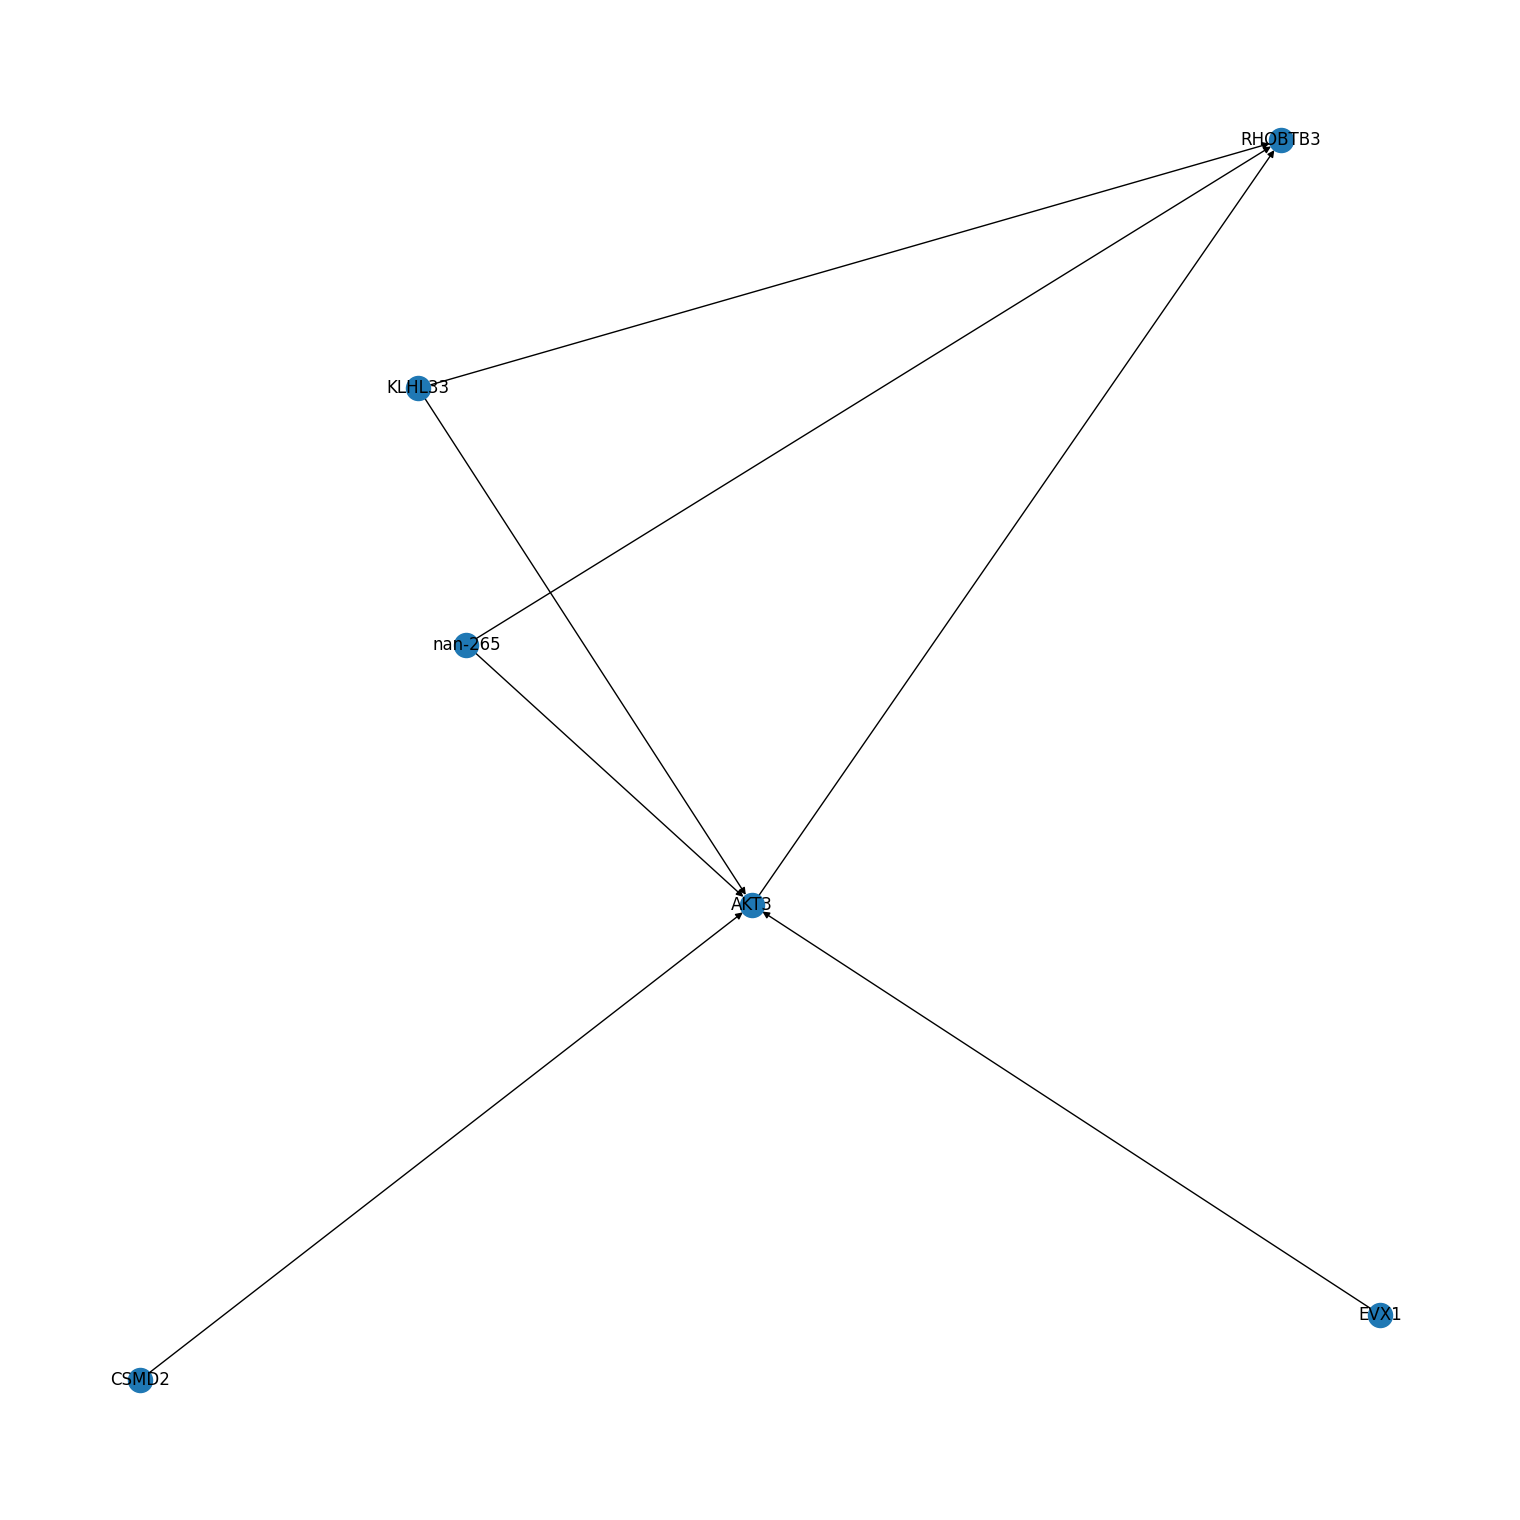

In [88]:
G = grn.plot_subgraph(grn.var[grn.var['cluster_2.0']=='7'].index.tolist(), only=200, interactive=False)#


In [90]:
enr = gp.enrichr(gene_list=list(G.nodes),
                 gene_sets=['KEGG_2021_Human', 'MSigDB_Hallmark_2020', 'Reactome_2022', 'Tabula_Sapiens', 'WikiPathway_2023_Human', 'TF_Perturbations_Followed_by_Expression', 'Reactome', 'PPI_Hub_Proteins', 'OMIM_Disease', 'GO_Molecular_Function_2023'],
                 organism='Human', # change accordingly
                 #description='pathway',
                 #cutoff=0.08, # test dataset, use lower value for real case  
                 background=grn.var.symbol.tolist(),
)
enr.res2d.head(20)


2024-07-19 16:22:33,763 [WARNING] Input library not found: Reactome. Skip
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/gseapy/enrichr.py:643: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,ATP Binding (GO:0005524),0.000468,0.004532,0,0,94.595238,725.291683,AKT3;RHOBTB3
1,GO_Molecular_Function_2023,Adenyl Ribonucleotide Binding (GO:0032559),0.000647,0.004532,0,0,79.380000,582.855047,AKT3;RHOBTB3
2,GO_Molecular_Function_2023,Purine Ribonucleoside Triphosphate Binding (GO...,0.001498,0.006992,0,0,50.705128,329.757829,AKT3;RHOBTB3
3,GO_Molecular_Function_2023,Small GTPase Binding (GO:0031267),0.026714,0.074804,0,0,46.788235,169.492832,RHOBTB3
4,GO_Molecular_Function_2023,GTPase Binding (GO:0051020),0.034029,0.074804,0,0,36.109091,122.068709,RHOBTB3
5,GO_Molecular_Function_2023,Ubiquitin Protein Ligase Binding (GO:0031625),0.038395,0.074804,0,0,31.752000,103.505960,RHOBTB3
6,GO_Molecular_Function_2023,Ubiquitin-Like Protein Ligase Binding (GO:0044...,0.038395,0.074804,0,0,31.752000,103.505960,RHOBTB3
7,GO_Molecular_Function_2023,Protein Serine/Threonine Kinase Activity (GO:0...,0.042745,0.074804,0,0,28.328571,89.305800,AKT3
8,GO_Molecular_Function_2023,Sequence-Specific Double-Stranded DNA Binding ...,0.134381,0.186187,0,0,8.297872,16.654465,EVX1
9,GO_Molecular_Function_2023,Double-Stranded DNA Binding (GO:0003690),0.134381,0.186187,0,0,8.297872,16.654465,EVX1


https://www.genecards.org/cgi-bin/carddisp.pl?gene=GSN

In [ ]:
metalloproteinases involved in iron and copper homeostasis

['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4'] Index(['ABCB5', 'FGF10', 'KAZALD1', 'SLC1A2', 'CALD1', 'CDH18', 'GSN',
       'BRINP3', 'CAGE1', 'CSMD3', 'GRIK1', 'KRT9', 'LINGO2', 'SCN4B',
       'TMEM31', 'CLRN3', 'NPSR1', 'DUSP21', 'STK31', 'OR8D1', 'SLC22A25',
       'SYNGAP1', 'FABP12', 'OR10G6', 'PRR23E', 'TRIM77', 'RBMY1B', 'nan-13',
       'OOSP4B', 'TMC4', 'MBOAT7-1'],
      dtype='object', name='symbol_2')


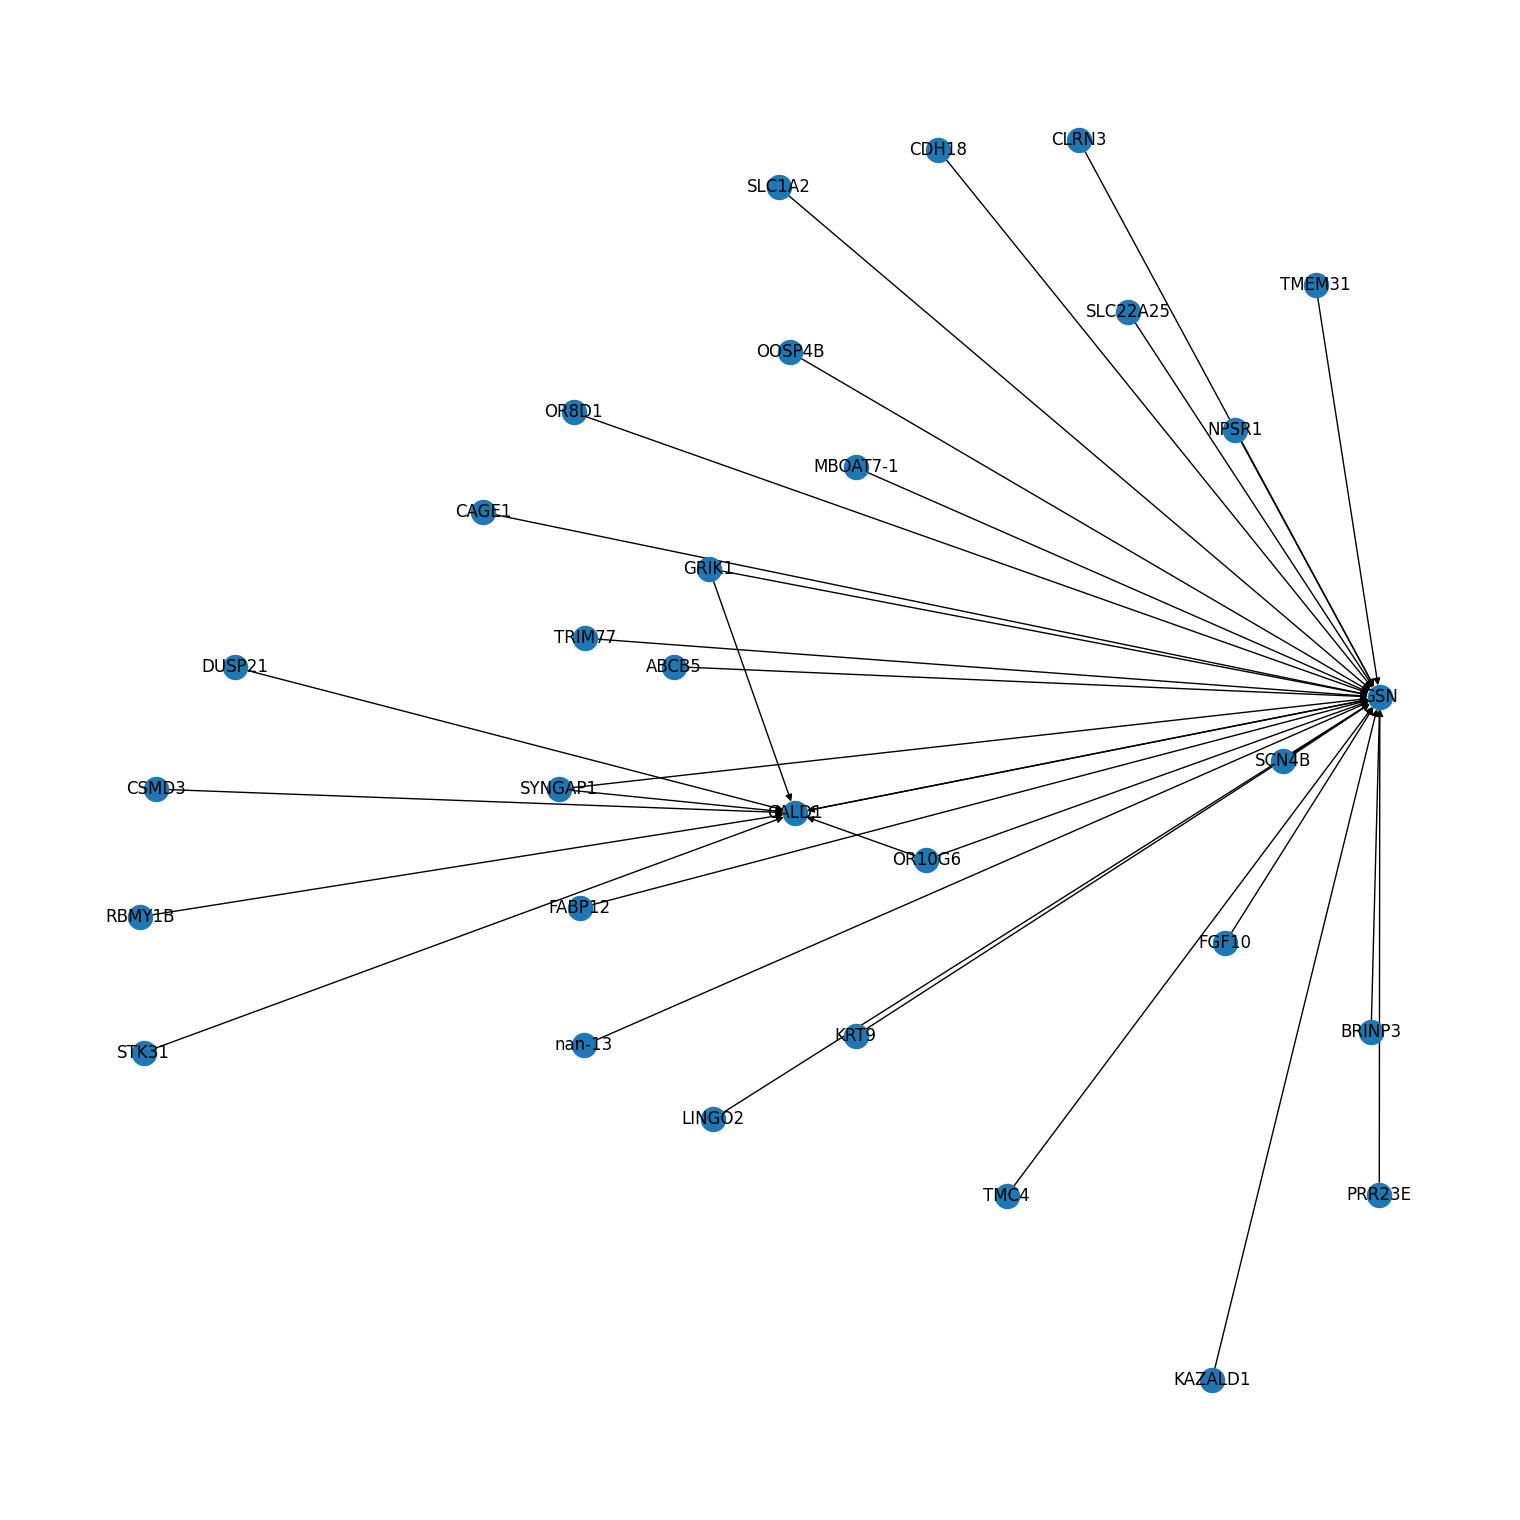

In [ ]:
G = grn.plot_subgraph(grn.var[grn.var['cluster_1.5']=='6'].index.tolist(), only=80, interactive=False)#

In [ ]:
enr = gp.enrichr(gene_list=list(G.nodes),
                 gene_sets=['GO_Molecular_Function_2023', 'MSigDB_Hallmark_2020', 'Reactome_2022', 'Tabula_Sapiens', 'WikiPathway_2023_Human', 'TF_Perturbations_Followed_by_Expression', 'Reactome', 'PPI_Hub_Proteins', 'OMIM_Disease'],#, 'GO_Molecular_Function_2023'],
                 organism='Human', # change accordingly
                 #description='pathway',
                 #cutoff=0.08, # test dataset, use lower value for real case  
                 background=grn.var.symbol.tolist(),
)
enr.res2d.head(20)

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Sodium Channel Activity (GO:0005272),0.001192,0.030835,0,0,54.675862,368.098752,GRIK1;SCN4B
1,GO_Molecular_Function_2023,Myosin Binding (GO:0017022),0.001581,0.030835,0,0,45.551724,293.787427,GSN;CALD1
2,GO_Molecular_Function_2023,L-glutamate Transmembrane Transporter Activity...,0.007750,0.075562,0,0,inf,inf,SLC1A2
3,GO_Molecular_Function_2023,Acidic Amino Acid Transmembrane Transporter Ac...,0.007750,0.075562,0,0,inf,inf,SLC1A2
4,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),0.010127,0.078987,0,0,15.137931,69.522307,CALD1;CDH18
5,GO_Molecular_Function_2023,Myosin II Binding (GO:0045159),0.015442,0.086032,0,0,132.266667,551.642165,GSN
6,GO_Molecular_Function_2023,Mechanosensitive Monoatomic Ion Channel Activi...,0.015442,0.086032,0,0,132.266667,551.642165,TMC4
7,GO_Molecular_Function_2023,Actin Binding (GO:0003779),0.020724,0.089996,0,0,10.068966,39.032044,GSN;CALD1
8,GO_Molecular_Function_2023,Neutral L-amino Acid Transmembrane Transporter...,0.023076,0.089996,0,0,66.116667,249.191670,SLC1A2
9,GO_Molecular_Function_2023,Amino Acid:Sodium Symporter Activity (GO:0005283),0.023076,0.089996,0,0,66.116667,249.191670,SLC1A2


# differential connections for hub genes

In [ ]:
## look at the connections of some key TFs in here
## do GSEA over these connections
## compare the connections of these same TFs for both conditions

['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e'] Index(['MT2A', 'HSPA1A', 'CREM', 'PTN', 'HLA-A', 'SPARCL1', 'SPOCK3', 'NR4A3',
       'APOD', 'CALD1', 'MGP', 'HSPE1', 'EIF4A1', 'CD99', 'EMP1', 'FABP4',
       'NAMPT', 'NNMT', 'RBP1', 'LUM', 'PAGE4'],
      dtype='object', name='ensembl_id_2')


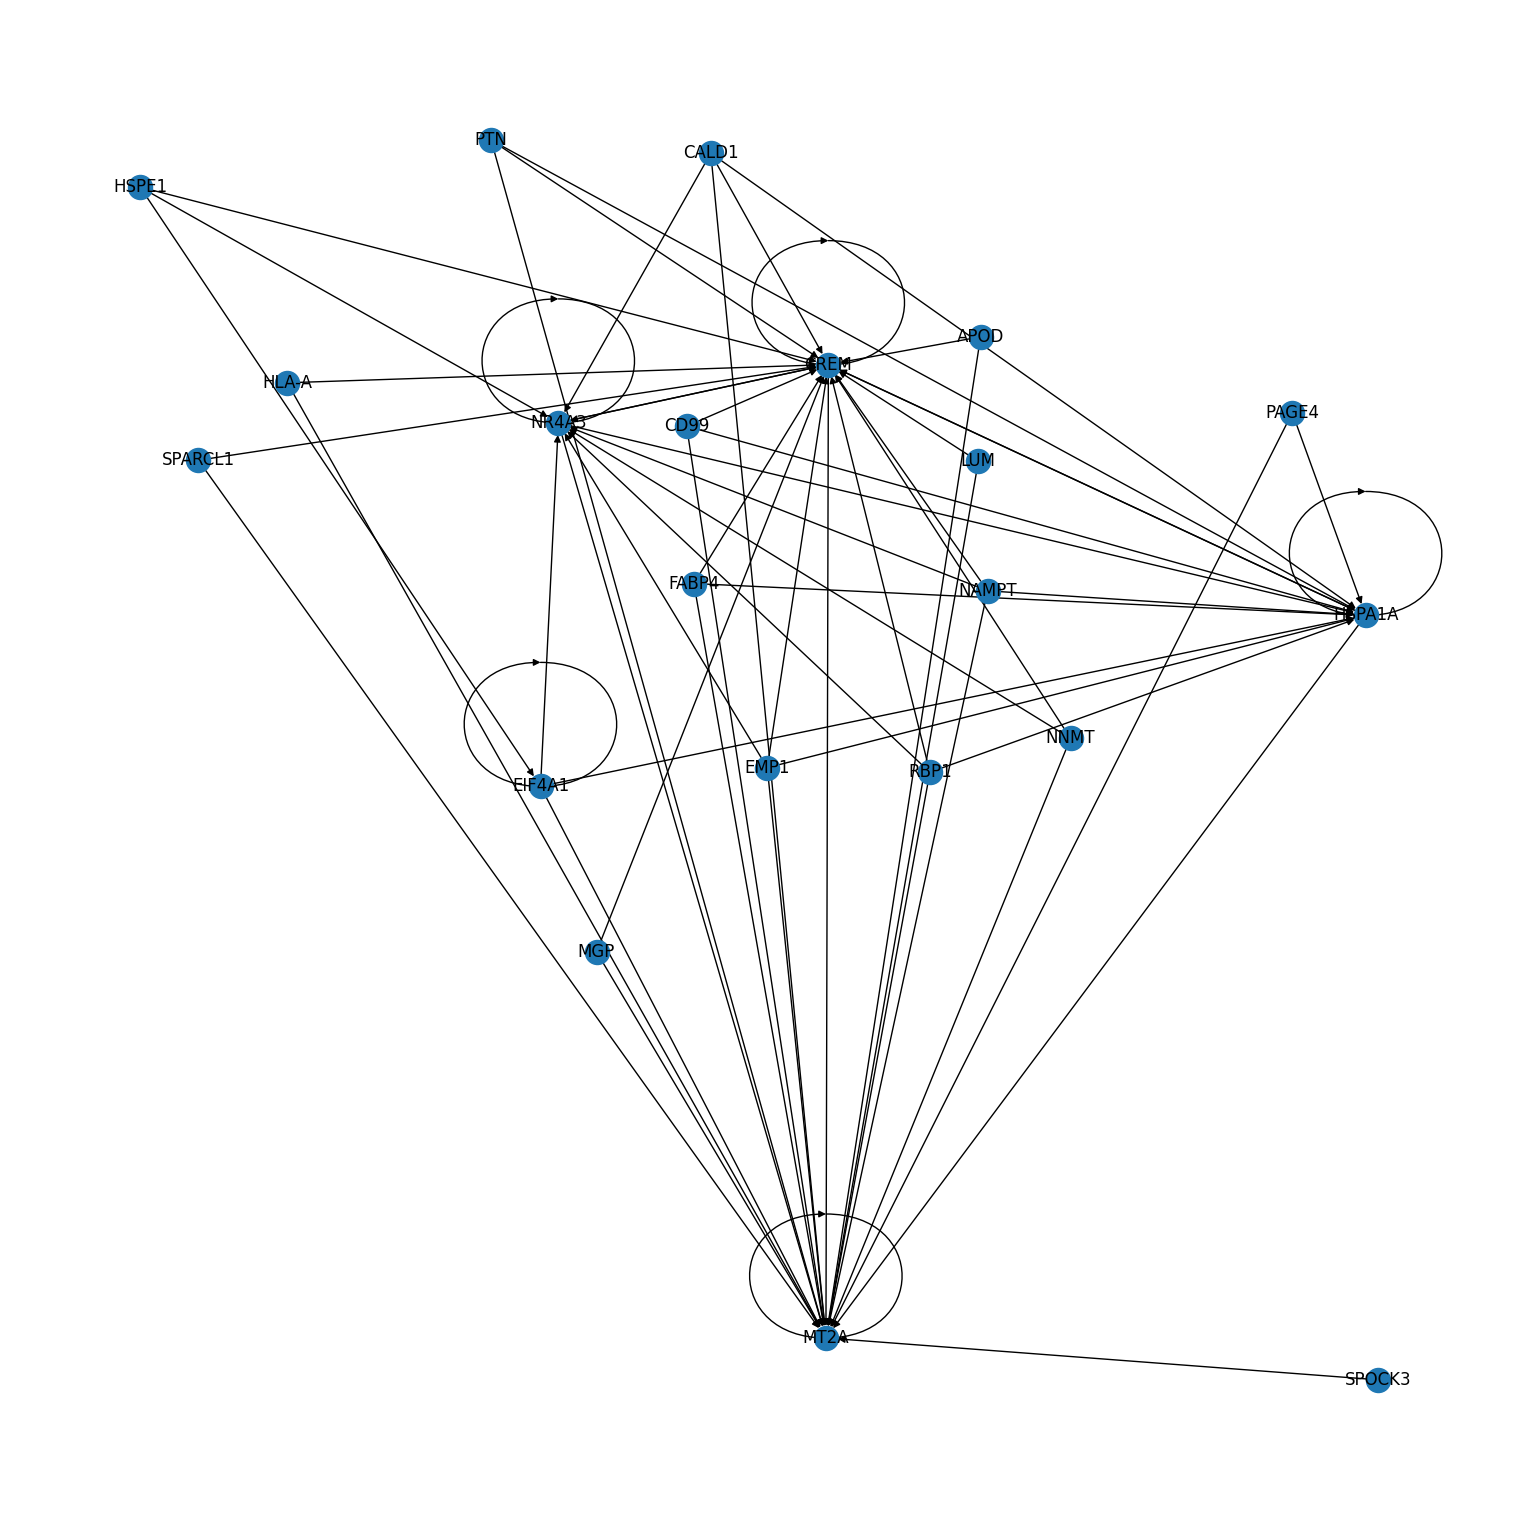

In [44]:
# find known genes and connections
G = grn_c.plot_subgraph("PAGE4", only=60, max_genes=20, interactive=False)#

In [ ]:
pnet = pnx.Network(notebook=True, cdn_resources="remote", directed=True)
pnet.from_nx(G)
first_node = list(G.nodes)[-1]
pnet.get_node(first_node)['color'] = "red"
pnet.show("temp.html")

In [45]:
# Assuming 'node_names' contains the list of gene names
enr = gp.enrichr(gene_list=list(G.nodes),
                 gene_sets=['KEGG_2021_Human', 'MSigDB_Hallmark_2020', 'Reactome_2022', 'Tabula_Sapiens', 'WikiPathway_2023_Human', 'TF_Perturbations_Followed_by_Expression', 'Reactome', 'PPI_Hub_Proteins', 'OMIM_Disease', 'GO_Molecular_Function_2023'],
                 organism='Human', # change accordingly
                 #description='pathway',
                # cutoff=0.02, # test dataset, use lower value for real case  
                 background=grn_c.var.symbol.tolist(),
)
enr.results.head(20)

2024-07-22 23:09:41,830 [WARNING] Input library not found: Reactome. Skip
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/gseapy/enrichr.py:643: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Nicotinate and nicotinamide metabolism,0.000389,0.015555,0,0,104.605263,821.388060,NNMT;NAMPT
1,KEGG_2021_Human,Endocytosis,0.005693,0.113859,0,0,20.836842,107.695788,HLA-A;HSPA1A
2,KEGG_2021_Human,Antigen processing and presentation,0.017309,0.199226,0,0,11.214794,45.493446,HLA-A;HSPA1A
3,KEGG_2021_Human,Cell adhesion molecules,0.019923,0.199226,0,0,10.365789,40.591420,HLA-A;CD99
4,KEGG_2021_Human,PPAR signaling pathway,0.041272,0.207434,0,0,28.371429,90.436253,FABP4
5,KEGG_2021_Human,Legionellosis,0.041272,0.207434,0,0,28.371429,90.436253,HSPA1A
6,KEGG_2021_Human,RNA transport,0.041272,0.207434,0,0,28.371429,90.436253,EIF4A1
7,KEGG_2021_Human,Spliceosome,0.051333,0.207434,0,0,22.055556,65.492209,HSPA1A
8,KEGG_2021_Human,Longevity regulating pathway,0.056326,0.207434,0,0,19.845000,57.086093,HSPA1A
9,KEGG_2021_Human,Regulation of lipolysis in adipocytes,0.056326,0.207434,0,0,19.845000,57.086093,FABP4


['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e'] Index(['nan-270', 'S100A6', 'MT2A', 'SPARCL1', 'MIF', 'SLC25A6', 'IGFBP7',
       'APOD', 'MGP', 'DCN', 'A2M', 'PTN', 'RELB', 'DNAJB9', 'AKR1C1', 'C1S',
       'CST3', 'CXCL8', 'FTH1', 'BRME1', 'PAGE4'],
      dtype='object', name='ensembl_id_2')


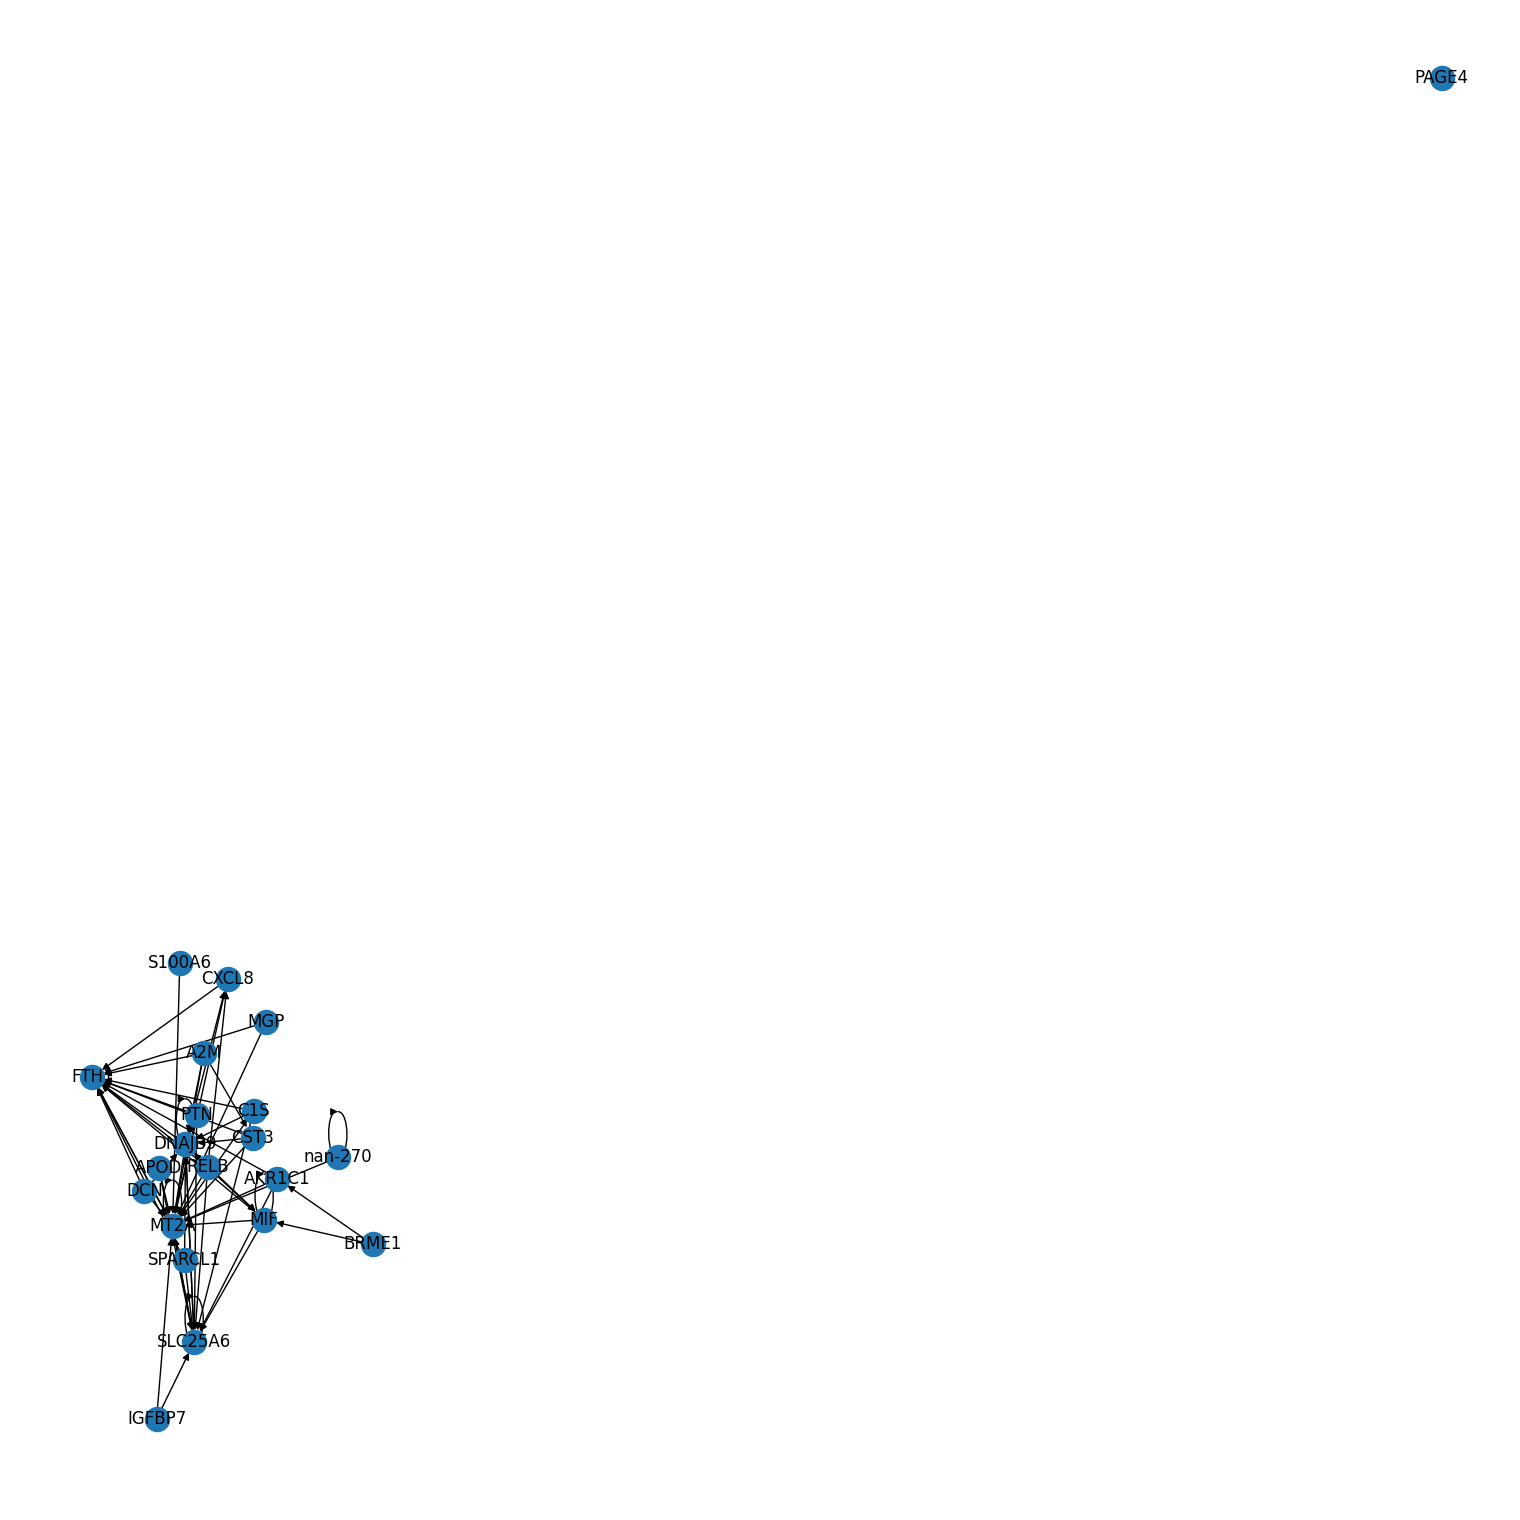

In [46]:
G = grn.plot_subgraph("PAGE4", only=60, max_genes=20, interactive=False)

# using classification

number of expressed genes in this cell type: 16801


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

true elem 2115 ...
doing regression....
metrics {'used_heads': 25, 'precision': 0.0, 'random_precision': 0.0006433550820644942, 'recall': 0.0, 'predicted_true': 177.0, 'number_of_true': 219.0, 'epr': 0.0}


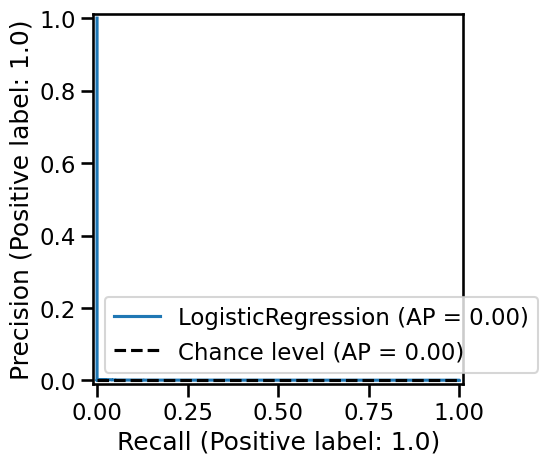

In [ ]:
grn_normal = grn_inferer(layer=list(range(model.nlayers))[:], cell_type="naive B cell")
grn_normal, m, omni_cls = train_classifier(grn_normal, C=0.5, train_size=0.9, class_weight={
                                    1: 200, 0: 1}, shuffle=True)

In [ ]:
# highlight differential links on genes that are expressed in both 
grn_normal.varp['all'] = grn_normal.varp['GRN'].copy()
grn_normal.varp['GRN'] = grn_normal.varp['classified']

In [ ]:
CAV1-expressing CAFs contribute to invasion and metastasis in breast cancer24
loss of caveolin1 (CAV1) is found in metabolically reprogrammed CAFs that promote tumorigenesis

discoidin domain-containing receptor 2 (DDR2)21 and integrin α11β122, have emerged to identify CAFs in the context of a specific TME
https://www.nature.com/articles/s12276-023-01013-0

normal fibroblast populations marked by the expression of Gli1 and Hoxb6

CAFs, remain perpetually activated with a high capacity for ECM synthesis and microenvironmental remodeling, leading to stromal desmoplasia, a phenomenon characterized by increased deposition of ECM components in tumors. In this regard, CAFs share many basic characteristics, such as a secretory phenotype and capacity to synthesize ECM components, with fibroblasts found in nonmalignant tissue fibrosis. Therefore, the classic markers found to be expressed in fibroblasts, including α-SMA, vimentin, desmin, fibroblast-specific protein 1 (FSP1; also known as S100A4)

Fibrogenesis is part of a normal protective response to tissue injury that can become irreversible and progressive, leading to fatal diseases. Senescent cells are a main driver of fibrotic diseases through their secretome, known as senescence-associated secretory phenotype (SASP)
CAFs (vCAFs), cycling CAFs (cCAFs), and developmental CAFs (dCAFs)

The stem-like ‘universal’ type of fibroblast cell, marked by expression of peptidase inhibitor 16 (Pi16) and Col15a, found in the steady state across tissues,
 activated fibroblasts, as observed by the development of LRRC15+ CAFs in PDAC.

 . SOCS1: Suppressor of cytokine signaling; STAT3: Signal transducer and activator of transcription 3; LDH: Lactate dehydrogenase; PYCR1: pyrroline-5-carboxylate reductase
-------------------
 senescence, and multiple types of fibrotic diseases in mice and humans are characterized by the accumulation of iron. https://www.nature.com/articles/s42255-023-00928-2
------------------
 Current evidence indicate that cancer-associated fibroblasts (CAFs) play an important role in prostate cancer (PCa) development and progression. playing a role in invasion.
 
 NDRG2, TSPAN1, PTN, APOE, OR51E2, P4HB, STEAP1 and ABCC4 were used to construct molecular subtypes and CAF-related gene prognostic index (CRGPI)

Studies on the role of STEAP1, OR51E2, PTN, ABCC4, NDRG2 have been relatively in-depth. For instance, STEAP1 is all-called six-transmembrane epithelial antigen of the prostate 1, which belongs to a family of metalloproteinases involved in iron and copper homeostasis and other cellular processes37. STEAP1 is overexpressed on the plasma membrane of PCa cells and is associated with PCa invasiveness and metastasis50. The possible mechanism of STEAP1 promoting tumor proliferation and metastasis is by acting as a channel for small molecules that are involved in intercellular communication
OR51E2 perhaps could be used as one of the biomarkers for PCa53,54,55,56
https://www.nature.com/articles/s41598-023-36125-0#Sec11
-----------------
The protein encoded by ABCC4 is a member of the superfamily of ATP-binding cassette (ABC) transporters, which is also called multidrug resistance protein 4 (MRP4)64. MRP4 was reported to be associated with drug resistance of PCa in many studies65,66,67

PRRX1, OSR1, FOXD1, HOXC4,LHX9, TBX3 and TWIST2,  targeted five or more TFs inthe fibroblast TRN. This influential-set explained 62.5% ofthe total number of regulatory edges and they collectivelytargeted 15 out of 18 TFs represented in the network. Upona closer examination of the fibroblastic network, the inter-actions among OSR1–PRRX1–TWIST2 were notably co-ordinated, regulating one another in both directions  https://www.researchgate.net/publication/264633205_A_transient_disruption_of_fibroblastic_transcriptional_regulatory_network_facilitates_trans-differentiation
--------------------
FGF receptors are important in PCa initiation and progression. These endocrine FGFs require alpha-Klotho (KL) and/or beta-Klotho (KLB), two related single-pass transmembrane proteins restricted in their tissue distribution. FGF19 is expressed in primary and metastatic PCa tissues where it functions as an autocrine growth factor.
https://www.e-cancer.fr/Professionnels-de-sante/Veille-bibliographique/Nota-Bene-Cancer/NBC-174/The-endocrine-fibroblast-growth-factor-FGF19-promotes-prostate-cancer-progression 

-------------------

• Prostate cancer stroma contains diverse populations of fibroblasts.
• Carcinoma associated fibroblasts can promote prostate carcinogenesis.
• Interaction among fibroblast subsets modulate stromal-epithelial paracrine signaling.
The stroma in the normal prostate is predominantly composed of smooth muscle cells while in cancer this is partially replaced by fibroblasts and myofibroblasts6. These fibroblastic cells are responsible for collagen and extracellular matrix (ECM) deposition, changing local organ stiffness

iCAF, myCAF, apCAF

It has been shown that SDF-1/CXCL12, secreted by CAF, acts via TGFβ–mediated upregulation of CXCR4 in epithelial cells to activate Akt signaling associated with tumorigenesis.  Overexpression of SDF-1/CXCL12 and TGFβ1 in benign human prostate fibroblasts has been shown to induce malignant transformation of benign prostate epithelial cells and formation of highly invasive tumors in vivo

increased cadherin 2 (CDH2) mRNA expression in LNCaP cells

Upregulation of DNA methyltransferases (DNMT) consistent with aberrant promoter hypermethylation of tumor-suppressor genes in multiple cancer types including PCa has been reported

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8788937/#:~:text=The%20stroma%20in%20the%20normal,deposition%2C%20changing%20local%20organ%20stiffness.

CD10 and GPR77 can define a human CAF subset that sustains cancer stemness 

--------------------
Fibroblasts are also fundamental for inducing angiogenesis by secreting angiogenic factors such as vascular endothelial growth factor (VEGF) and matrix proteins
Epithelial cells release TGFβ ligands, Kallikrein-related peptidase-4 (KLK4),
CAFs are characterized by molecular markers that are upregulated compared to normal fibroblasts, such as fibroblast activation protein (FAP), PDGFR-β, fibroblast-specific protein-1 (FSP-1) (also known as S100A4)

ACTA2	α-smooth actin (α-SMA)	Upregulated	RT-qPCR, IHC on tissue microarrays	[42,43]
ASPN	Asporin	Upregulated	Tag-based RNA profiling, microarray profiling, IHC, RT-qPCR	[38,44,45]
CAV1	Caveolin-1	Downregulated	Tag profiling, IHC, RT-qPCR	[38]
COL1A1	Collagen Type-I	Upregulated	RT-qPCR, IHC	[42,43]
CXCL12	Stromal cell-derived factor 1 (SDF1)/ (C-X-C motif chemokine ligand 12 (CXCL12)	Upregulated	Tag-profiling, RT-qPCR, ELISA	[38,46]
FAP	Fibroblast activation protein	Upregulated	IHC	[42]
FGF2, FGF7, FGF10	Fibroblast growth factor-2/-7/-10	Upregulated	RT-qPCR, Western Blot, IHC	[43,47,48]
FN1	Fibronectin	Upregulated	Tag profiling, IHC, RT-qPCR	[38]
ITGA1	Integrin-α1 (CD49a)	Upregulated	IHC	[49]
OGN	Osteoglycin	Upregulated	Tag-profiling, IHC, RT-qPCR	[38]
PDGFRB	Platelet-derived growth factor receptor β	Upregulated	Microarray profiling	[44,50]
POSTN	Periostin	Upregulated	Microarray profiling, IHC	[44]
S100A4	Fibroblast-specific protein 1 (FSP1)/S100 Calcium Binding Protein A4 (S100A4)	Upregulated	Immunofluorescence, RT-qPCR, Western Blot	[51,52,53]
S100A6	S100 Calcium Binding Protein A6	Downregulated	Tag profiling, IHC, RT-qPCR	[38]
SPARC	Secreted Protein Acidic and Cysteine Rich	Up/downregulated	Microarray profiling, Tag-profiling	[38,44]
STC1	Stanniocalcin 1	Downregulated	Tag profiling, IHC, RT-qPCR	[38]
THY1	Cluster of differentiation 90 (CD90) antigen	Upregulated	IHC	[54]
TNC	Tenascin C	Upregulated	RT-qPCR, IHC	[42,43]
VIM	Vimentin	Upregulated	IHC

Benign prostatic hyperplasia (BPH) is a non-malignant growth of the prostate, typically occurring in older men with an occurrence of 80–90% of men in their 70s
BPH develops in the transition zone differently from PCa foci, which usually develop in the peripheral zone


ESR1= . Here we studied the role of CAF estrogen receptor alpha (ERα) and found that it could protect against PCa invasion. ERα could function through a CAF–epithelial interaction via selectively upregulating thrombospondin 2 (Thbs2) and downregulating matrix metalloproteinase 3 (MMP3) at the protein and messenger RNA levels
https://academic.oup.com/carcin/article/35/6/1301/449417

ACTA2: we found that “reactive CAFs” induce shear resistance to prostate tumor cells via intercellular contact and soluble derived factors. The reactive CAFs showed higher expression of α-smooth muscle actin (α-SMA) and fibroblast activation protein (FAP) compared to differentiated CAFs
https://www.oncotarget.com/article/27510/

------------------
 Proteins that exhibited a significant increase in CAF versus NPF were enriched for the functional categories “cell adhesion” and the “extracellular matrix.” The CAF phosphoproteome exhibited enhanced phosphorylation of proteins associated with the “spliceosome” and “actin binding.”
  COL1A1/2 and COL5A1; the receptor tyrosine kinase discoidin domain-containing receptor 2 (DDR2), a receptor for fibrillar collagens; and lysyl oxidase-like 2 (LOXL2)
https://www.mcponline.org/article/S1535-9476(20)31548-6/fulltext

------------------

•Cancer-associated fibroblasts (CAFs) exhibit a highly aligned cytoskeleton and extracellular matrix.
•CAFs are stiffer than normal fibroblasts from the prostate.
•Benign prostate epithelial cells are more compliant after co-culture with CAFs.
•Benign epithelial cells are more invasive and proliferative in presence of CAFs.
https://www.sciencedirect.com/science/article/pii/S2590006420300338 

------------------
 These findings suggest that CAFs exosomes drive PCa metastasis via the miR-500a-3p/FBXW7/HSF1 axis in a hypoxic microenvironmen
https://www.nature.com/articles/s41417-024-00742-2
--------------------
